In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/2022503035/Documents/machine_learning_2022503035/back propagation/INPUT_VALUES.xlsx'
df = pd.read_excel(file_path)
print(df)

X = df[['X1', 'X2', 'X3']].values
print(X)
y = df['O'].values.reshape(-1, 1)
print(y)

   X1  X2  X3  O
0   0   0   0  0
1   0   0   1  1
2   0   1   0  1
3   0   1   1  0
4   1   0   0  1
5   1   0   1  0
6   1   1   0  0
7   1   1   1  1
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]


In [18]:

W14 = 0.2
W15 = -0.3
W24 = 0.4
W25 = 0.1
W34 = -0.5
W35 = 0.2
W46 = -0.3
W56 = -0.2
b4 = -0.4
b5 = 0.2
b6 = 0.1


W1 = np.array([[W14, W15], [W24, W25], [W34, W35]]) 
b1 = np.array([b4, b5]) 

W2 = np.array([[W46], [W56]]) 
b2 = np.array([b6]) 


In [19]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def feedforward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1  
    A1 = sigmoid(Z1) 

    Z2 = np.dot(A1, W2) + b2 
    A2 = sigmoid(Z2)  
    
    return A1, A2


def compute_error(y_pred, y):
    return np.mean((y_pred - y) ** 2)


def backpropagate(X, y, A1, A2, W1, b1, W2, b2, learning_rate):
   
    dA2 = A2 - y
    dZ2 = dA2 * A2 * (1 - A2)  
    dW2 = np.dot(A1.T, dZ2) 
    db2 = np.sum(dZ2, axis=0) 
    
   
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * A1 * (1 - A1)  
    dW1 = np.dot(X.T, dZ1)  
    db1 = np.sum(dZ1, axis=0) 
    
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2


def train_network(X, y, W1, b1, W2, b2, learning_rate, iterations=1000):
    errors = []

    for i in range(iterations):
       
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)
        error = compute_error(A2, y)
        errors.append(error)
        
        W1, b1, W2, b2 = backpropagate(X, y, A1, A2, W1, b1, W2, b2, learning_rate)
    
    return errors, W1, b1, W2, b2


learning_rates = [0.01, 0.1, 0.5]
all_errors = {}



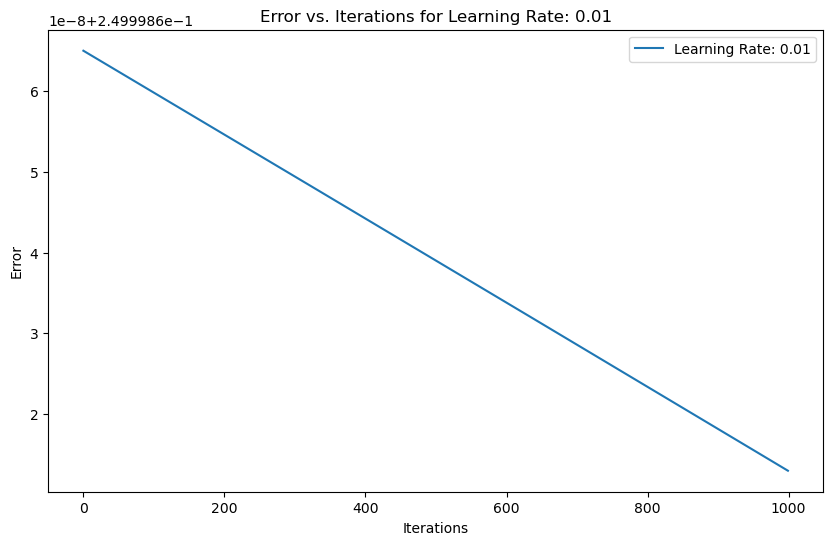

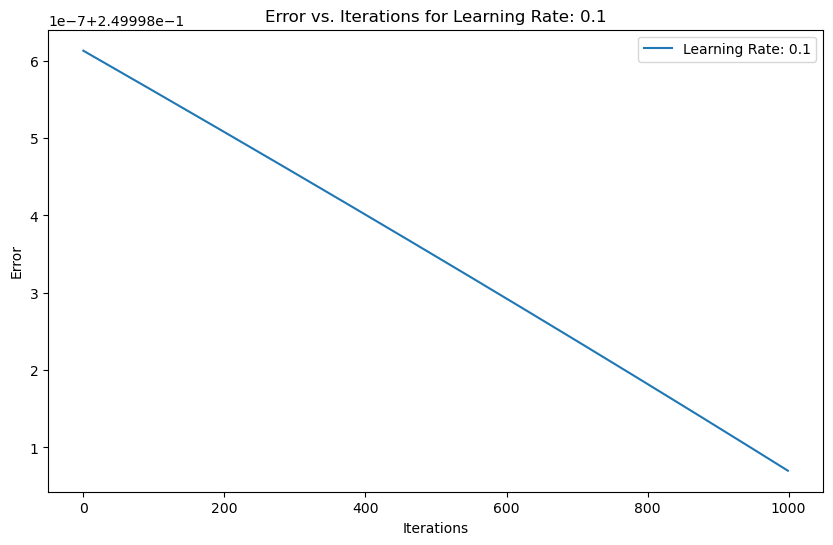

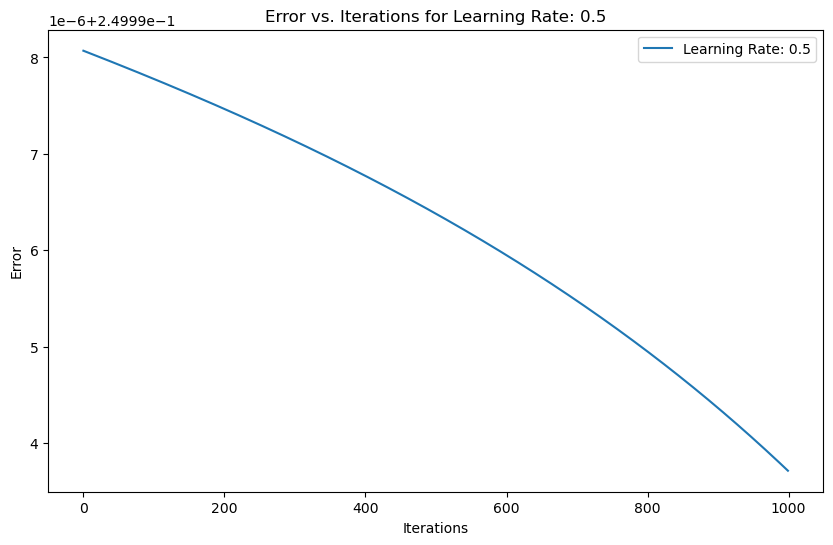

In [22]:
for lr in learning_rates:
    errors, _, _, _, _ = train_network(X, y, W1, b1, W2, b2, lr)
    all_errors[lr] = errors
    plt.figure(figsize=(10, 6))
    plt.plot(range(1000), errors, label=f"Learning Rate: {lr}")
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title(f'Error vs. Iterations for Learning Rate: {lr}')
    plt.legend()
    plt.show()  


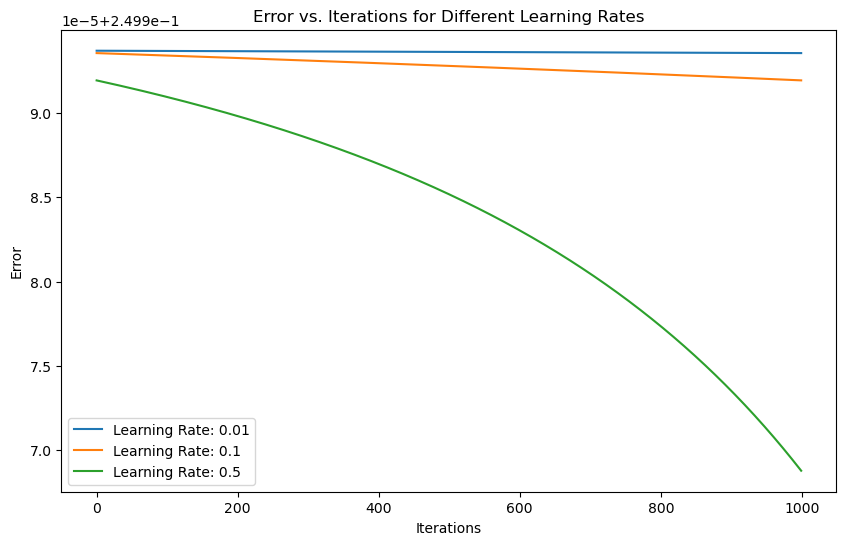

In [23]:

for lr in learning_rates:
    errors, _, _, _, _ = train_network(X, y, W1, b1, W2, b2, lr)
    all_errors[lr] = errors

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(1000), all_errors[lr], label=f"Learning Rate: {lr}")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations for Different Learning Rates')
plt.legend()
plt.show()